In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Swift Vs Wagonr Classification/

/gdrive/MyDrive/Swift Vs Wagonr Classification


In [4]:
ls

swift/  wagonr/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Swift Vs Wagonr Classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4000 files belonging to 2 classes.


In [9]:
class_names = dataset.class_names
class_names

['swift', 'wagonr']

In [10]:
len(dataset)

65

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[40.90625  42.90625  31.90625 ]
  [38.1875   40.09375  29.375   ]
  [40.9375   41.9375   33.9375  ]
  ...
  [80.       73.15625  54.625   ]
  [96.78125  86.15625  66.25    ]
  [91.21875  80.21875  58.28125 ]]

 [[36.756104 38.756104 27.756104]
  [34.645752 36.552002 25.833252]
  [36.331055 37.331055 29.331055]
  ...
  [79.043945 72.200195 53.668945]
  [94.13037  83.50537  63.59912 ]
  [88.4375   77.4375   55.5     ]]

 [[28.569824 30.569824 19.569824]
  [27.633545 29.539795 18.821045]
  [28.175537 29.175537 21.175537]
  ...
  [79.16333  72.31958  53.78833 ]
  [91.18457  80.55957  60.65332 ]
  [85.72681  74.72681  53.74292 ]]

 ...

 [[87.203125 86.203125 82.203125]
  [91.515625 90.515625 86.515625]
  [71.93384  70.93384  66.93384 ]
  ...
  [84.03125  75.03125  70.03125 ]
  [83.125    74.125    69.125   ]
  [82.53931  73.53931  68.53931 ]]

 [[89.377686 88.377686 84.377686]
  [92.74756  91.74756  87.74756 ]
  [72.57324  71.57324  67.57324 ]
  ...
  [86.047

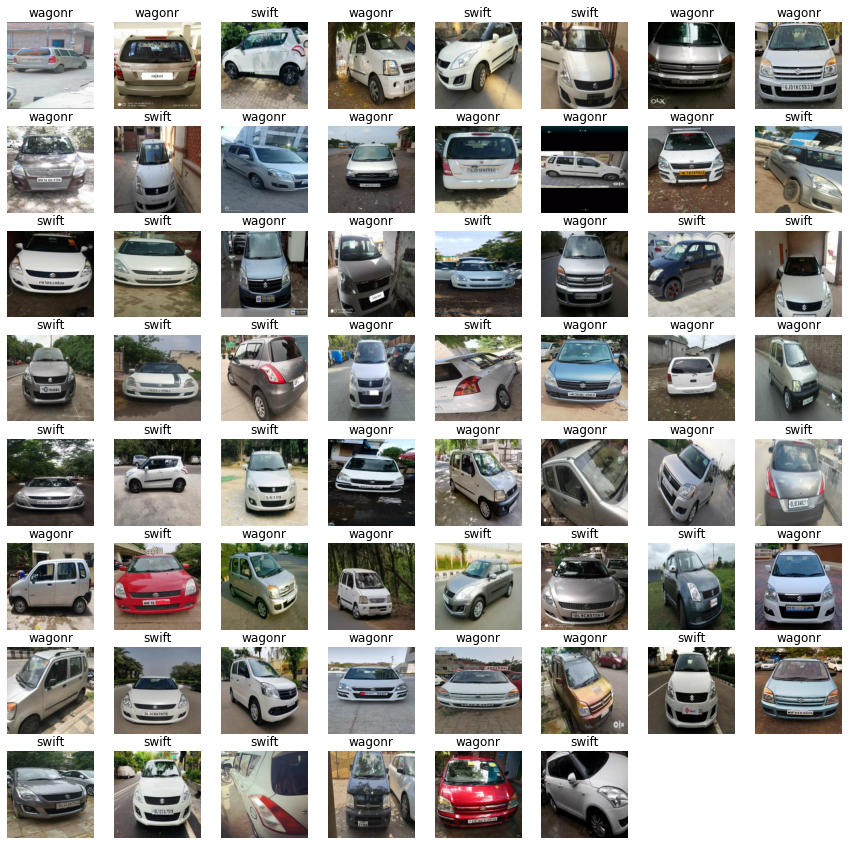

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='nadam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
52/52 [==============================] - 639s 6s/step - loss: 0.8609 - accuracy: 0.4919 - val_loss: 0.7528 - val_accuracy: 0.4597
Epoch 2/20
52/52 [==============================] - 313s 6s/step - loss: 0.7002 - accuracy: 0.5319 - val_loss: 0.6909 - val_accuracy: 0.5403
Epoch 3/20
52/52 [==============================] - 311s 6s/step - loss: 0.6640 - accuracy: 0.6068 - val_loss: 0.5646 - val_accuracy: 0.7554
Epoch 4/20
52/52 [==============================] - 310s 6s/step - loss: 0.5713 - accuracy: 0.7145 - val_loss: 0.4067 - val_accuracy: 0.8199
Epoch 5/20
52/52 [==============================] - 311s 6s/step - loss: 0.4113 - accuracy: 0.8053 - val_loss: 0.3679 - val_accuracy: 0.8441
Epoch 6/20
52/52 [==============================] - 310s 6s/step - loss: 0.3234 - accuracy: 0.8475 - val_loss: 0.2562 - val_accuracy: 0.9005
Epoch 7/20
52/52 [==============================] - 310s 6s/step - loss: 0.2749 - accuracy: 0.8798 - val_loss: 0.2354 - val_accuracy: 0.8898
Epoch 8/20
52

In [21]:
model.evaluate(test_ds)

7/7 [==============================] - 21s 1s/step - loss: 0.0950 - accuracy: 0.9653


[0.09504730999469757, 0.9653465151786804]

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

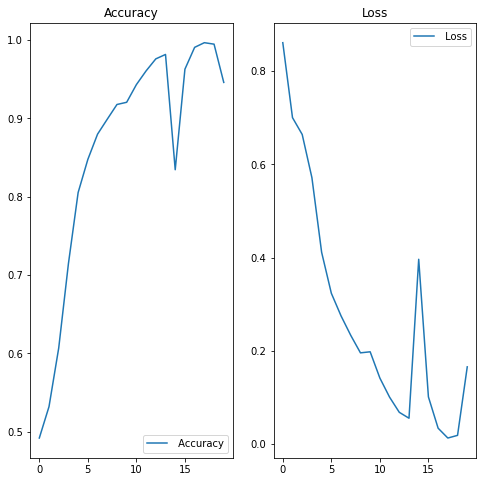

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

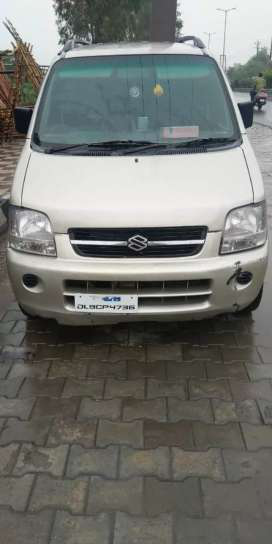

In [24]:
image_path = "/gdrive/My Drive/zziye90gv7m32-IN.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'wagonr'

In [28]:
model.save("Swift Vs Wagonr Classification.h5")